# A comparison of Decision Tree and Random Forest using the dataset of MAGIC Telescope

Such data belong to two classes, originating either from incident gamma rays or caused by hadronic showers. Ref: Methods for multidimensional event classification: a case study using images from a Cherenkov gamma-ray telescope 

All the libraries are imported and then the csv file is loaded. Deleted the blank row in excel sheet.

Attribute Information:

fLength: continuous # major axis of ellipse [mm]

fWidth: continuous # minor axis of ellipse [mm]

fSize: continuous # 10-log of sum of content of all pixels [in #phot]

fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]

fConc1: continuous # ratio of highest pixel over fSize [ratio]

fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]

fM3Long: continuous # 3rd root of third moment along major axis [mm]

fM3Trans: continuous # 3rd root of third moment along minor axis [mm]

fAlpha: continuous # angle of major axis with vector to origin [deg]

fDist: continuous # distance from origin to center of ellipse [mm]

class: g,h # gamma (signal), hadron (background)

### Loading the dataset

In [1]:
import numpy as np # Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('MagicTelescope.csv') # loading the data
df

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19016,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19017,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19018,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19019,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [2]:
df1 = df.rename(columns={'fLength:': 'fLength', 'fWidth:': 'fWidth', 'fSize:': 'fSize', 'fConc:': 'fConc', 'fConc1:' : 'fConc1', 'fAsym:': 'fAsym', 'fM3Long:':'fM3Long', 'fM3Trans:':'fM3Trans','fAlpha:':'fAlpha','fDist:':'fDist','class:':'class'})
df1 # All the column names are renamed

,ID,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19016,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19017,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19018,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19019,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


The classes 'g' and 'h' are assigned as 1 and 0.

In [3]:
df1['class'] = df1['class'].map({'g': 1, 'h': 0}) # Labeling the class 'g' as 1 and 'h' as 0.
df1

,ID,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19016,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,19017,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,19018,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,19019,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


### Missing values

In [4]:
df1_null = df1.isnull().sum() # this step is followed to look for missing values.
df1_null

ID          0
fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

### Class Distribution

In [5]:
df['class:'].value_counts() # Checking the count of each class

g    12332
h     6688
Name: class:, dtype: int64

<AxesSubplot:xlabel='class:', ylabel='count'>

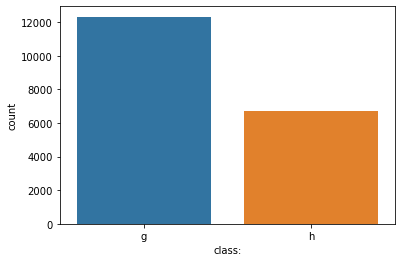

In [6]:
sns.countplot(x ='class:', data = df) # Visualizing the distribution of each class

In [7]:
Magic_df = df1.iloc[:,1:12] # Subsetting the predictors and target from the dataframe 
Magic_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


### Basic statistics of the data

In [8]:
Magic_df.describe() # Basic statistics

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [9]:
Magic_df1 = Magic_df.drop(Magic_df[Magic_df['class'] != 0].index)
Magic_df1 # Subsetting the dataframe of class g.

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,0
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,0
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,0
12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,0
12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [10]:
Magic_df0 = Magic_df.drop(Magic_df[Magic_df['class'] != 1].index)
Magic_df0 # Subsetting the dataframe of class h.

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370,1
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980,1
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810,1
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090,1


### Visualizing the outliers

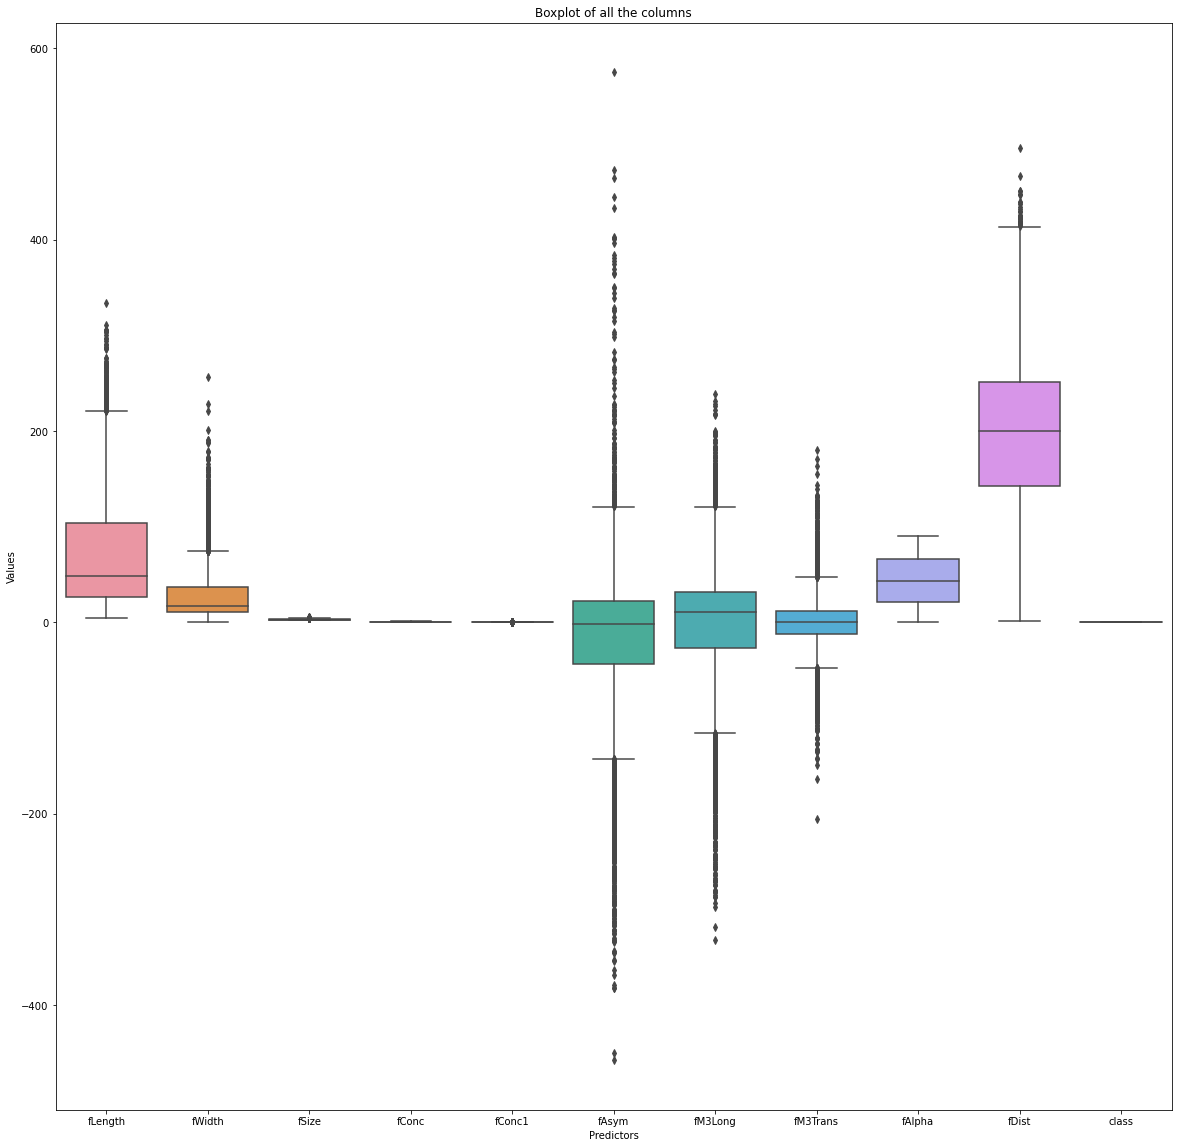

In [11]:
fig, ax = plt.subplots(figsize = (20,20)) # Observing the outliers of the class g.
chart = sns.boxplot(data= Magic_df1)
plt.title("Boxplot of all the columns")
plt.xlabel("Predictors")
plt.ylabel("Values")
plt.show()

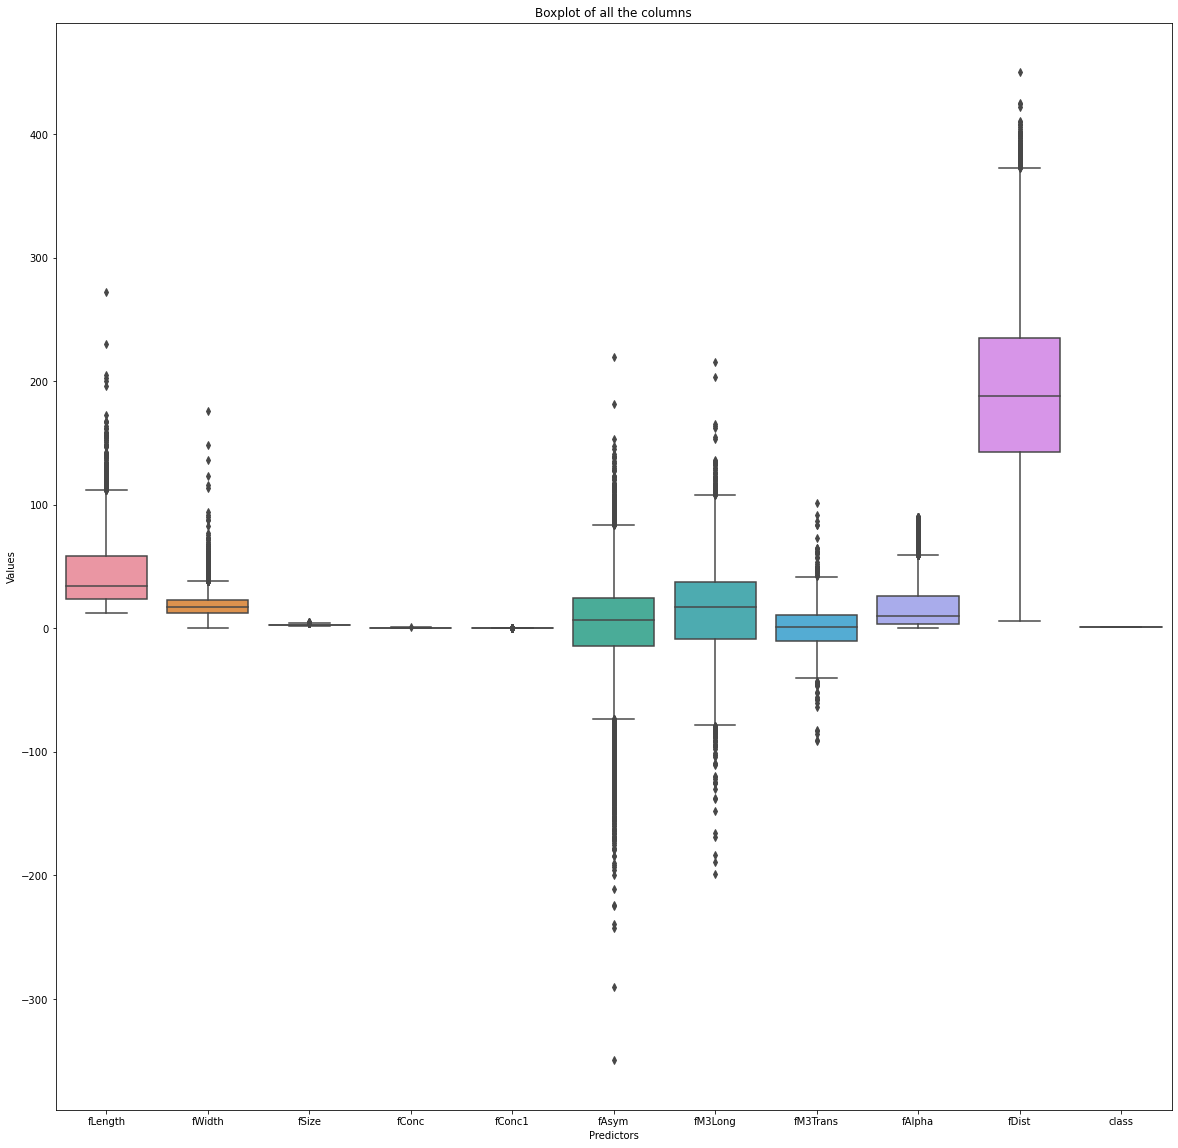

In [12]:
fig, ax = plt.subplots(figsize = (20,20)) # Observing the outliers of the class h.
chart = sns.boxplot(data= Magic_df0)
plt.title("Boxplot of all the columns")
plt.xlabel("Predictors")
plt.ylabel("Values")
plt.show()

### Collinearity using pairplot and correlation matrix

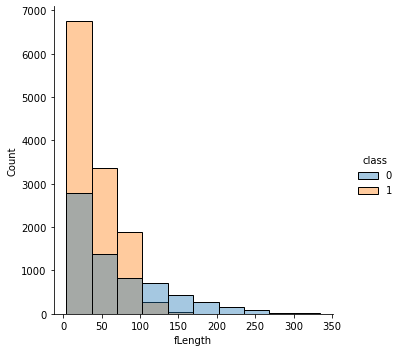

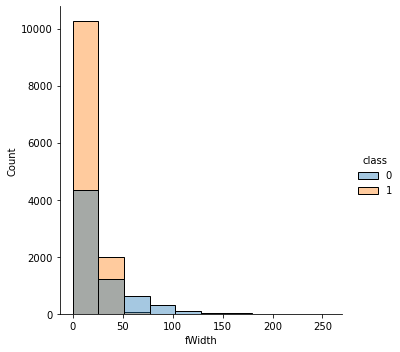

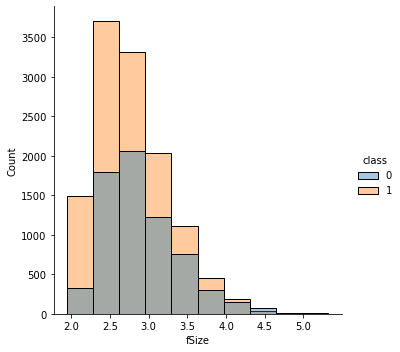

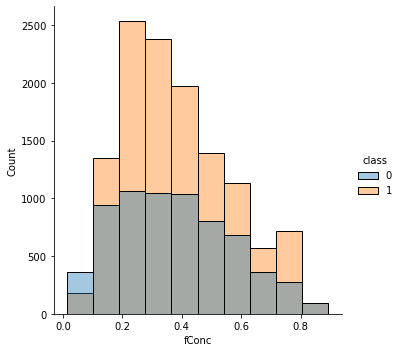

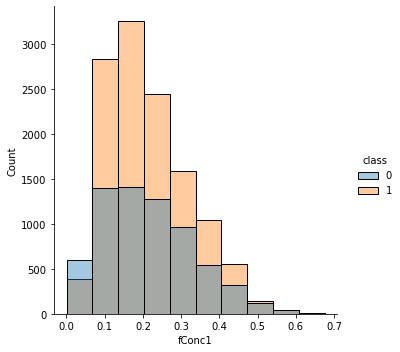

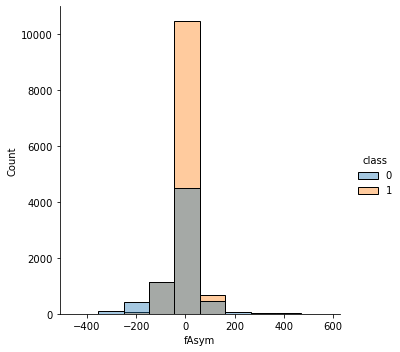

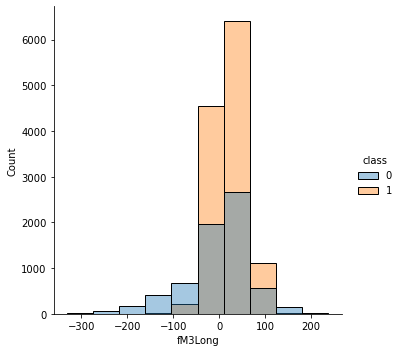

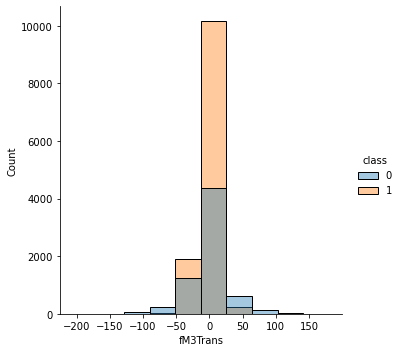

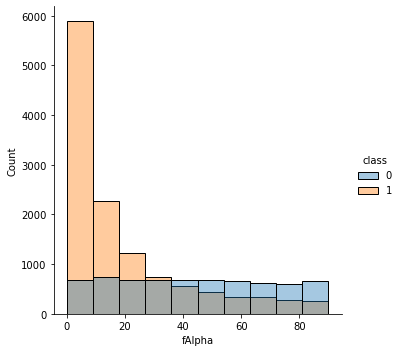

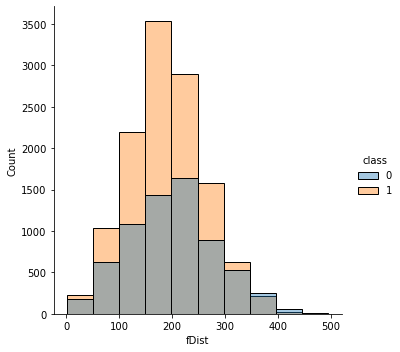

In [13]:
sns.displot(Magic_df,x="fLength", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fWidth", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fSize", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fConc", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fConc1", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fAsym", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fM3Long", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fM3Trans", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fAlpha", hue = "class", bins = 10, alpha = 0.4)
sns.displot(Magic_df,x="fDist", hue = "class", bins = 10, alpha = 0.4)

### Collinearity using pairplot and correlation matrix

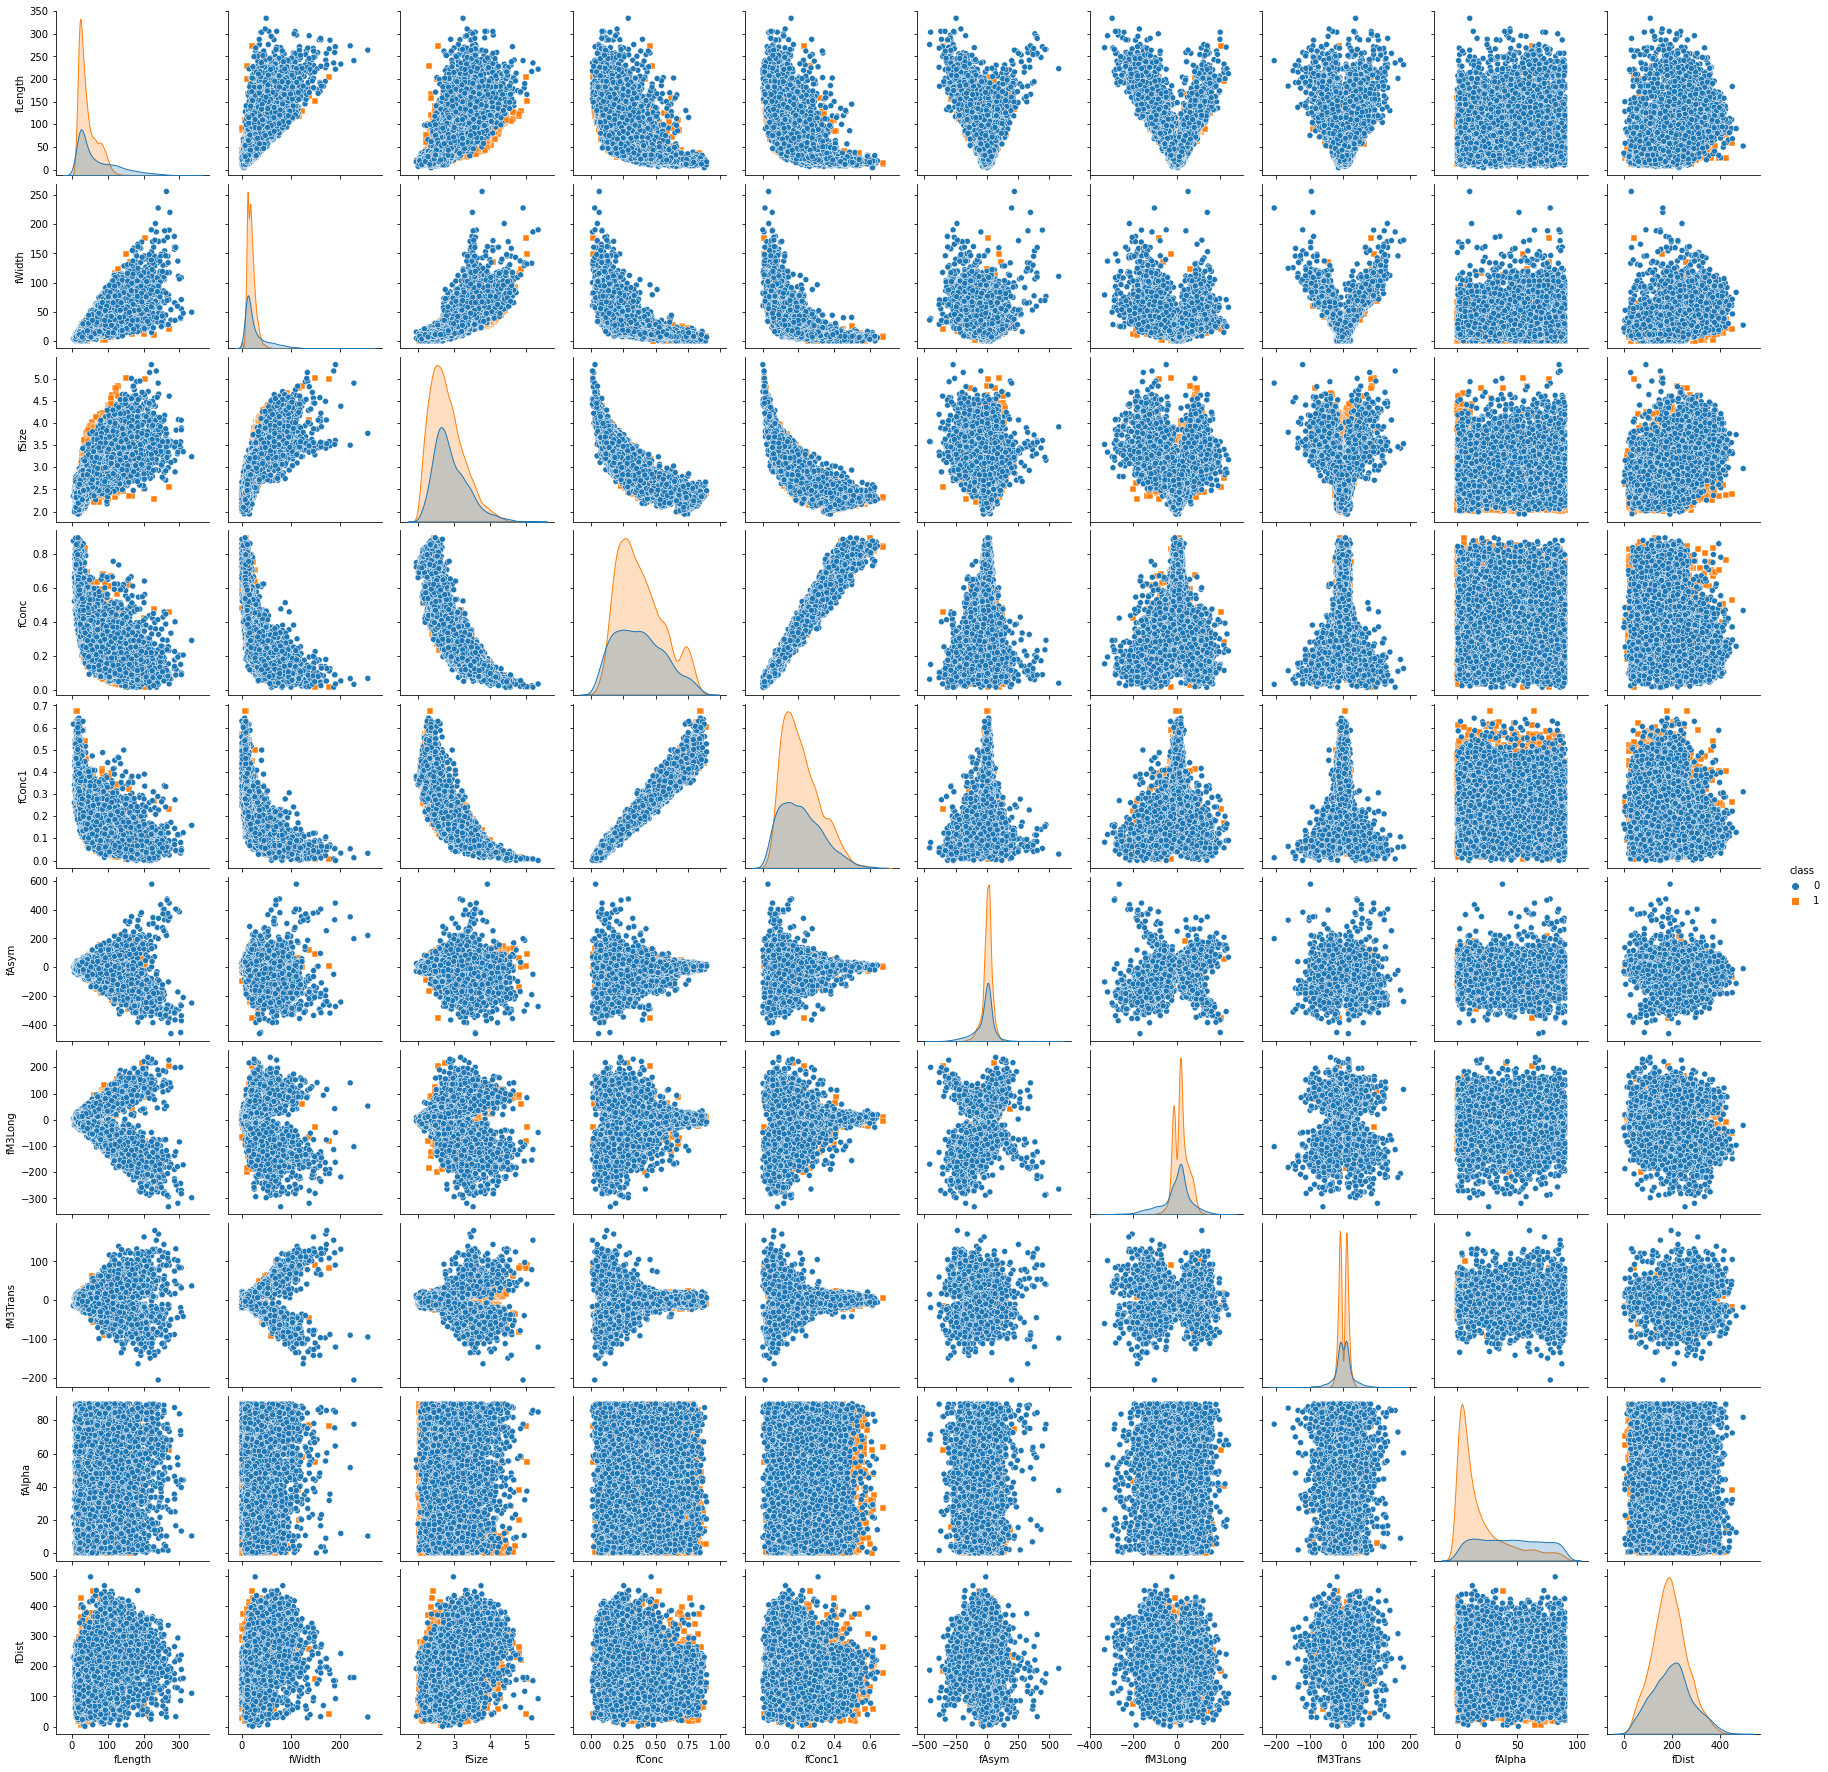

In [14]:
sns.pairplot(Magic_df, hue='class', markers=["o", "s"]) #https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [15]:
Magic_Corr = Magic_df.corr()
Magic_Corr

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466,-0.307572
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816,-0.265596
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041,-0.117795
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332,0.024615
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625,0.004797
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730,0.173587
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025,0.193409
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427,-0.003837
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556,-0.460979
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000,-0.065203


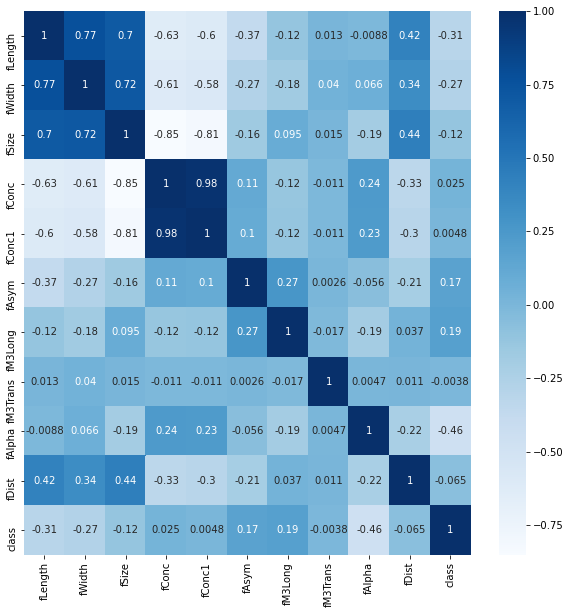

In [16]:
plt.subplots(figsize=(10,10))
Heat_map = sns.heatmap(Magic_Corr, cmap="Blues", annot=True)
plt.show()

In [17]:
import pandas
from IPython.display import FileLink
import os
Magic_df.to_csv('Magic_df.csv', index=False)